In [1]:
import pandas as pd
import math
import random

In [2]:
# constants
TOTAL_SIMS = 100_000
K_RANGE = 40

Profitable coins: 272


<Axes: >

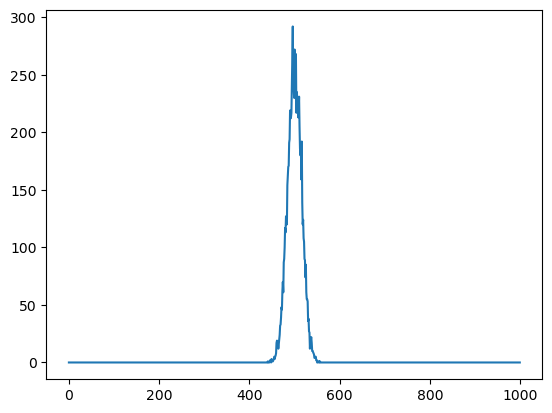

In [3]:
"""
Beginning with an initial run at a fair coin to validate functions we can use later
"""

"""
    p is the probability that the coin is heads.  so if  p = .45 then if the
    random value is .4 it's heads, .5 tails to account for bias
"""
def flip_coin(p: float):
    flip_val = random.random()
    return flip_val < p

def simulate_n_flips(n: int, p: float):
    heads = 0
    tails = 0
    for _ in range(0, n):
        is_heads = flip_coin(p)
        if is_heads:
            heads += 1
        else:
            tails += 1
    return heads

profitable_coins = 0
vals = [0 for _ in range(0, 1000)]
for _ in range(0, 10_000):
    count_heads = simulate_n_flips(1000, .5)
    vals[count_heads] = vals[count_heads] + 1
    if count_heads == 500:
        profitable_coins += 1

print(f'Profitable coins: {profitable_coins}')
count_series = pd.Series(vals)
count_series.plot()


In [4]:
'''
We can see from above, that if we're flipping a fair coin, we'd make ~ $2600 from flipping 100,000 coins.  But we don't have all fair coins.
Now, let's assume that each coin can have a probability that is normally distributed around .5 with a standard deviation of .05 to match Penny's assumption.
'''

def get_coin_bias():
    return random.gauss(.5, .05)

'''
Now, we have introduced the risk of getting a coin that may not be biased
'''
def run_simulation(n: int, k:int):
    profit = 0
    losses = 0
    for i in range(0, n):
        coin_bias = get_coin_bias()
        heads = simulate_n_flips(1000, coin_bias)
        if heads < 500 - k or heads > 500 + k:
            continue
        if coin_bias < .45 or coin_bias > .55:
            profit -= 10
            losses += 1
        else:
            profit += 1
    
    return {
        'profit': profit,
        'bad_coins': losses
    }

print(run_simulation(100_000, 0))




{'profit': 715, 'bad_coins': 1}


In [5]:

'''QUESTION 2.2 RESPONSE: based on the results from simulations, strategy 1 seems incredibly accurate, with an incredibly unlikely chance of seeing a bad coin'''

'QUESTION 2.2 RESPONSE: based on the results from simulations, strategy 1 seems incredibly accurate, with an incredibly unlikely chance of seeing a bad coin'

<Axes: >

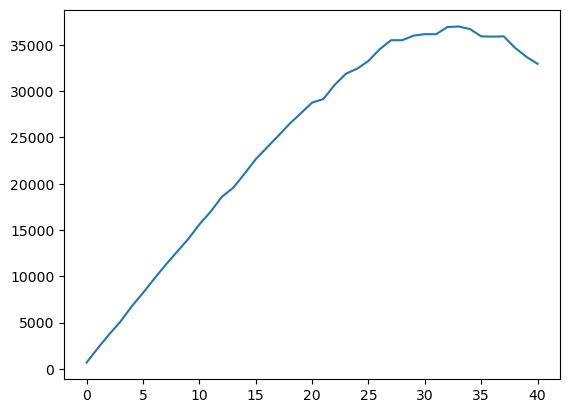

In [6]:
''''
Now, let's look at strategy 2, where we'll increase our tolerance interval from 0 to 40
'''

profits = []
bad_coins = []
for k in range(0, 41):
    result = run_simulation(100_000, k)
    profits.append(result['profit'])
    bad_coins.append(result['bad_coins'])

profit_s = pd.Series(profits)
profit_s.plot()

In [7]:
''' k value with the highest profit '''
profits.index(profit_s.max())

33

<Axes: >

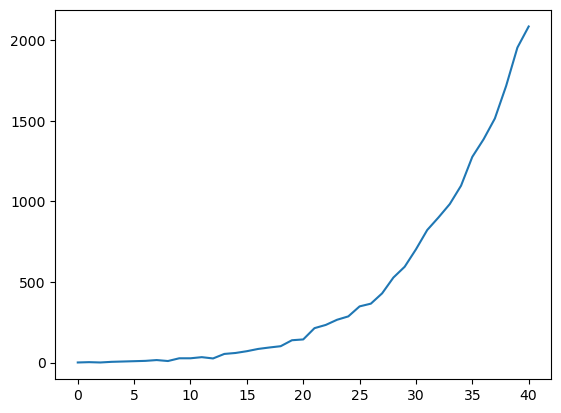

In [8]:
'''' count of bad coins encountered.  We can see it getting significantly higher as we go'''
bad_coins_s = pd.Series(bad_coins)
bad_coins_s.plot()